In [80]:
import pandas as pd
import numpy as np
!pip install eli5
import os
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
import math

In [81]:
os.getcwd()

'/content'

In [82]:
#importing the dataset
data = pd.read_csv("Hotel_Reservations.csv").dropna()

In [83]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [84]:
#Q1 : What are the data types? (Only numeric and categorical)
#There are 2 types : Numerical and Categorical
#Numerical - no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, required_car_parking_space, lead_time, arrival_year, arrival_month, arrival_date, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests
#Categorical- Booking_ID, type_of_meal_plan, room_type_reserved, market_segment_type, booking_status

In [85]:
#Q2 : Are there missing values?
#There are no missing values in the dataset
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<Axes: >

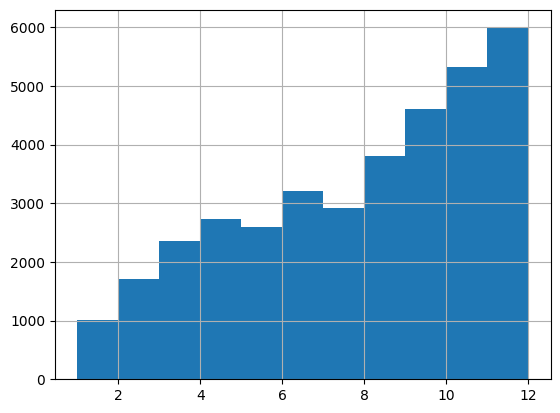

In [86]:
#Q3 : What are the likely distributions of the numeric variables?
bin_values = np.arange(start = 1, stop = 13, step = 1)
data.arrival_month.hist(bins=bin_values)

<Axes: >

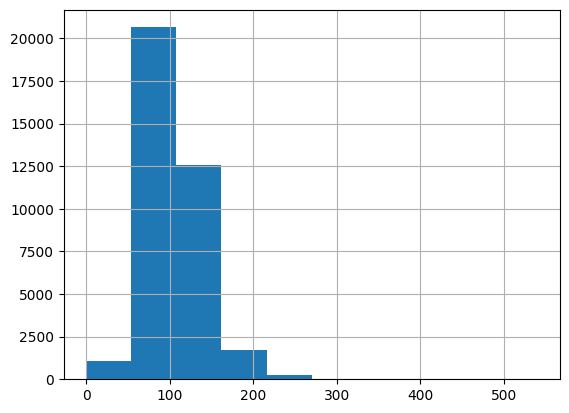

In [87]:
data.avg_price_per_room.hist()

<Axes: >

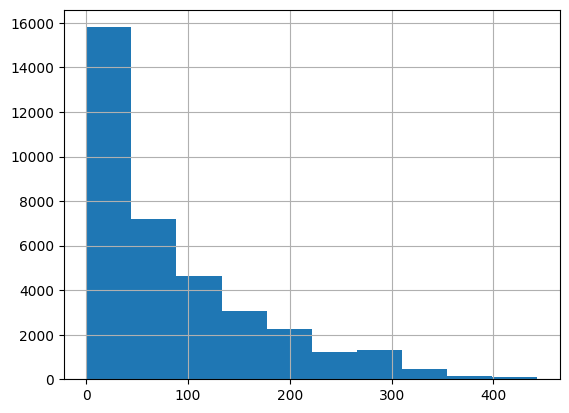

In [88]:
data.lead_time.hist()

<Figure size 800x500 with 0 Axes>

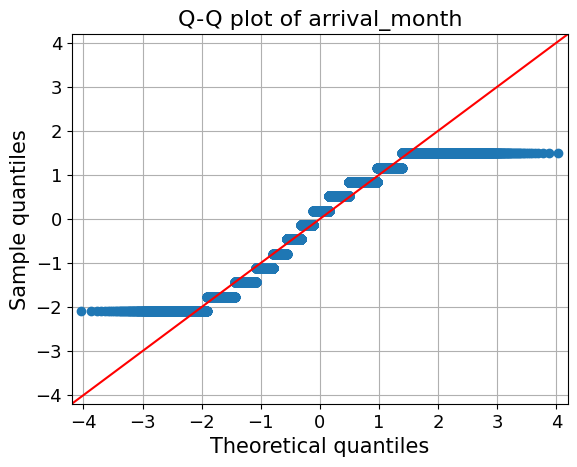

<Figure size 800x500 with 0 Axes>

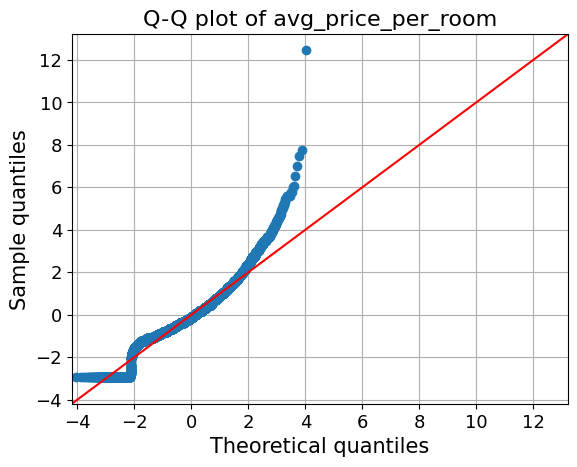

<Figure size 800x500 with 0 Axes>

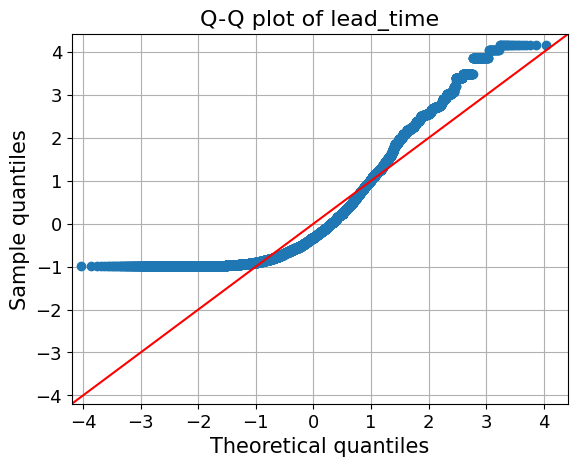

In [89]:
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
data_norm= data[['arrival_month', 'avg_price_per_room', 'lead_time']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

In [90]:
data_dummies = pd.get_dummies(data[['arrival_month', 'avg_price_per_room', 'lead_time',  'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights']])

<Axes: >

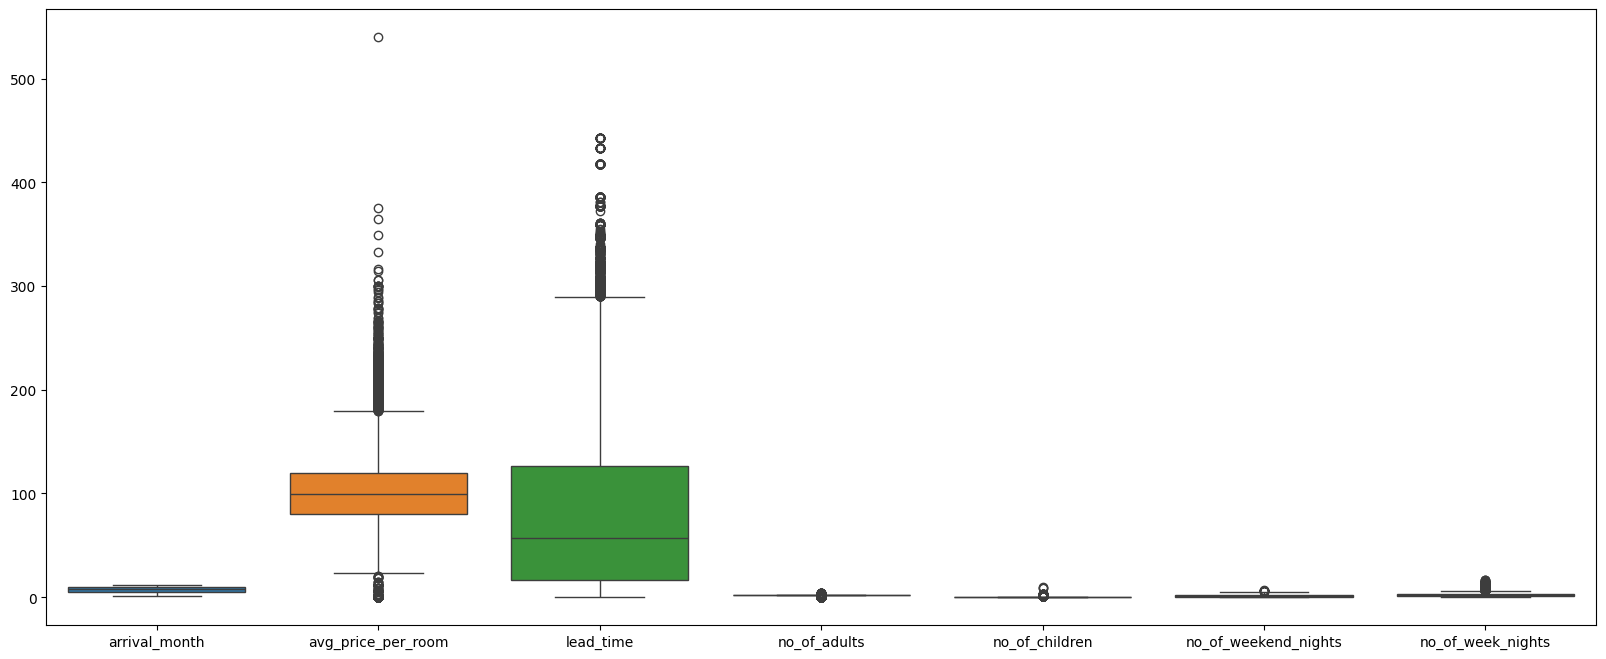

In [91]:
plt.figure(figsize=(20,8))
sns.boxplot(data=data_dummies)

<Axes: >

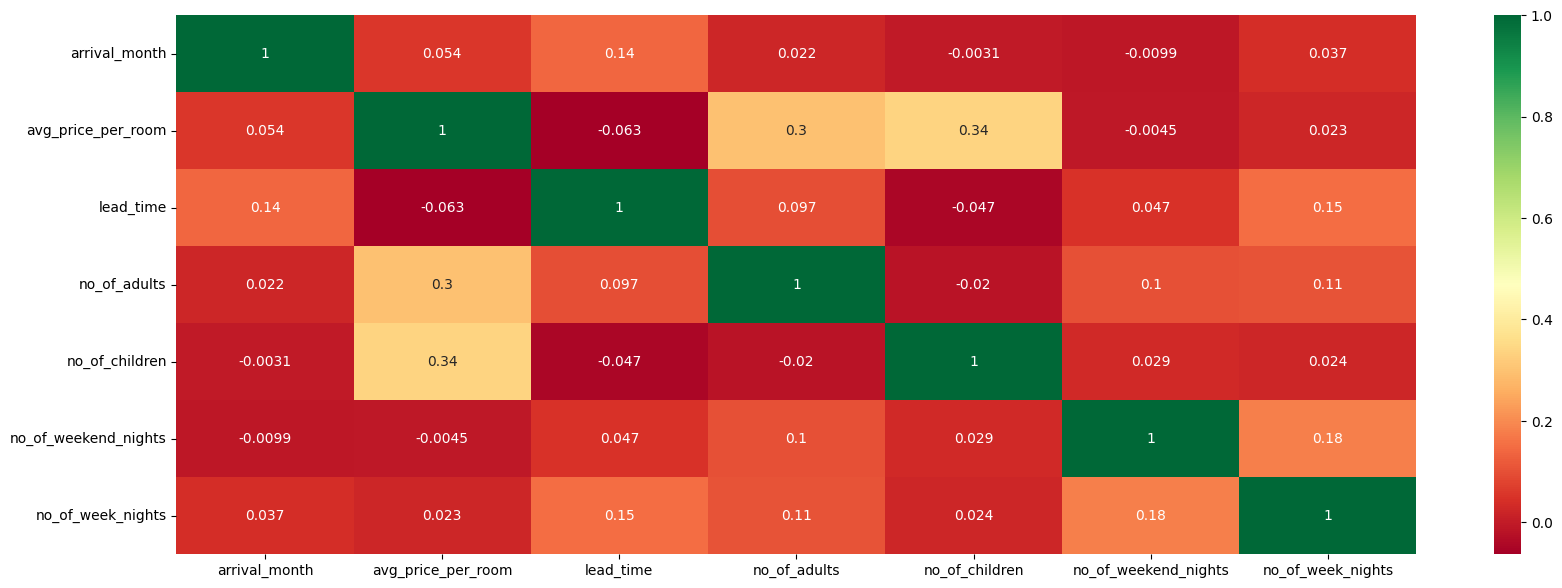

In [92]:
plt.figure(figsize=(20,7))
sns.heatmap(data_dummies.corr(), annot=True, cmap='RdYlGn')

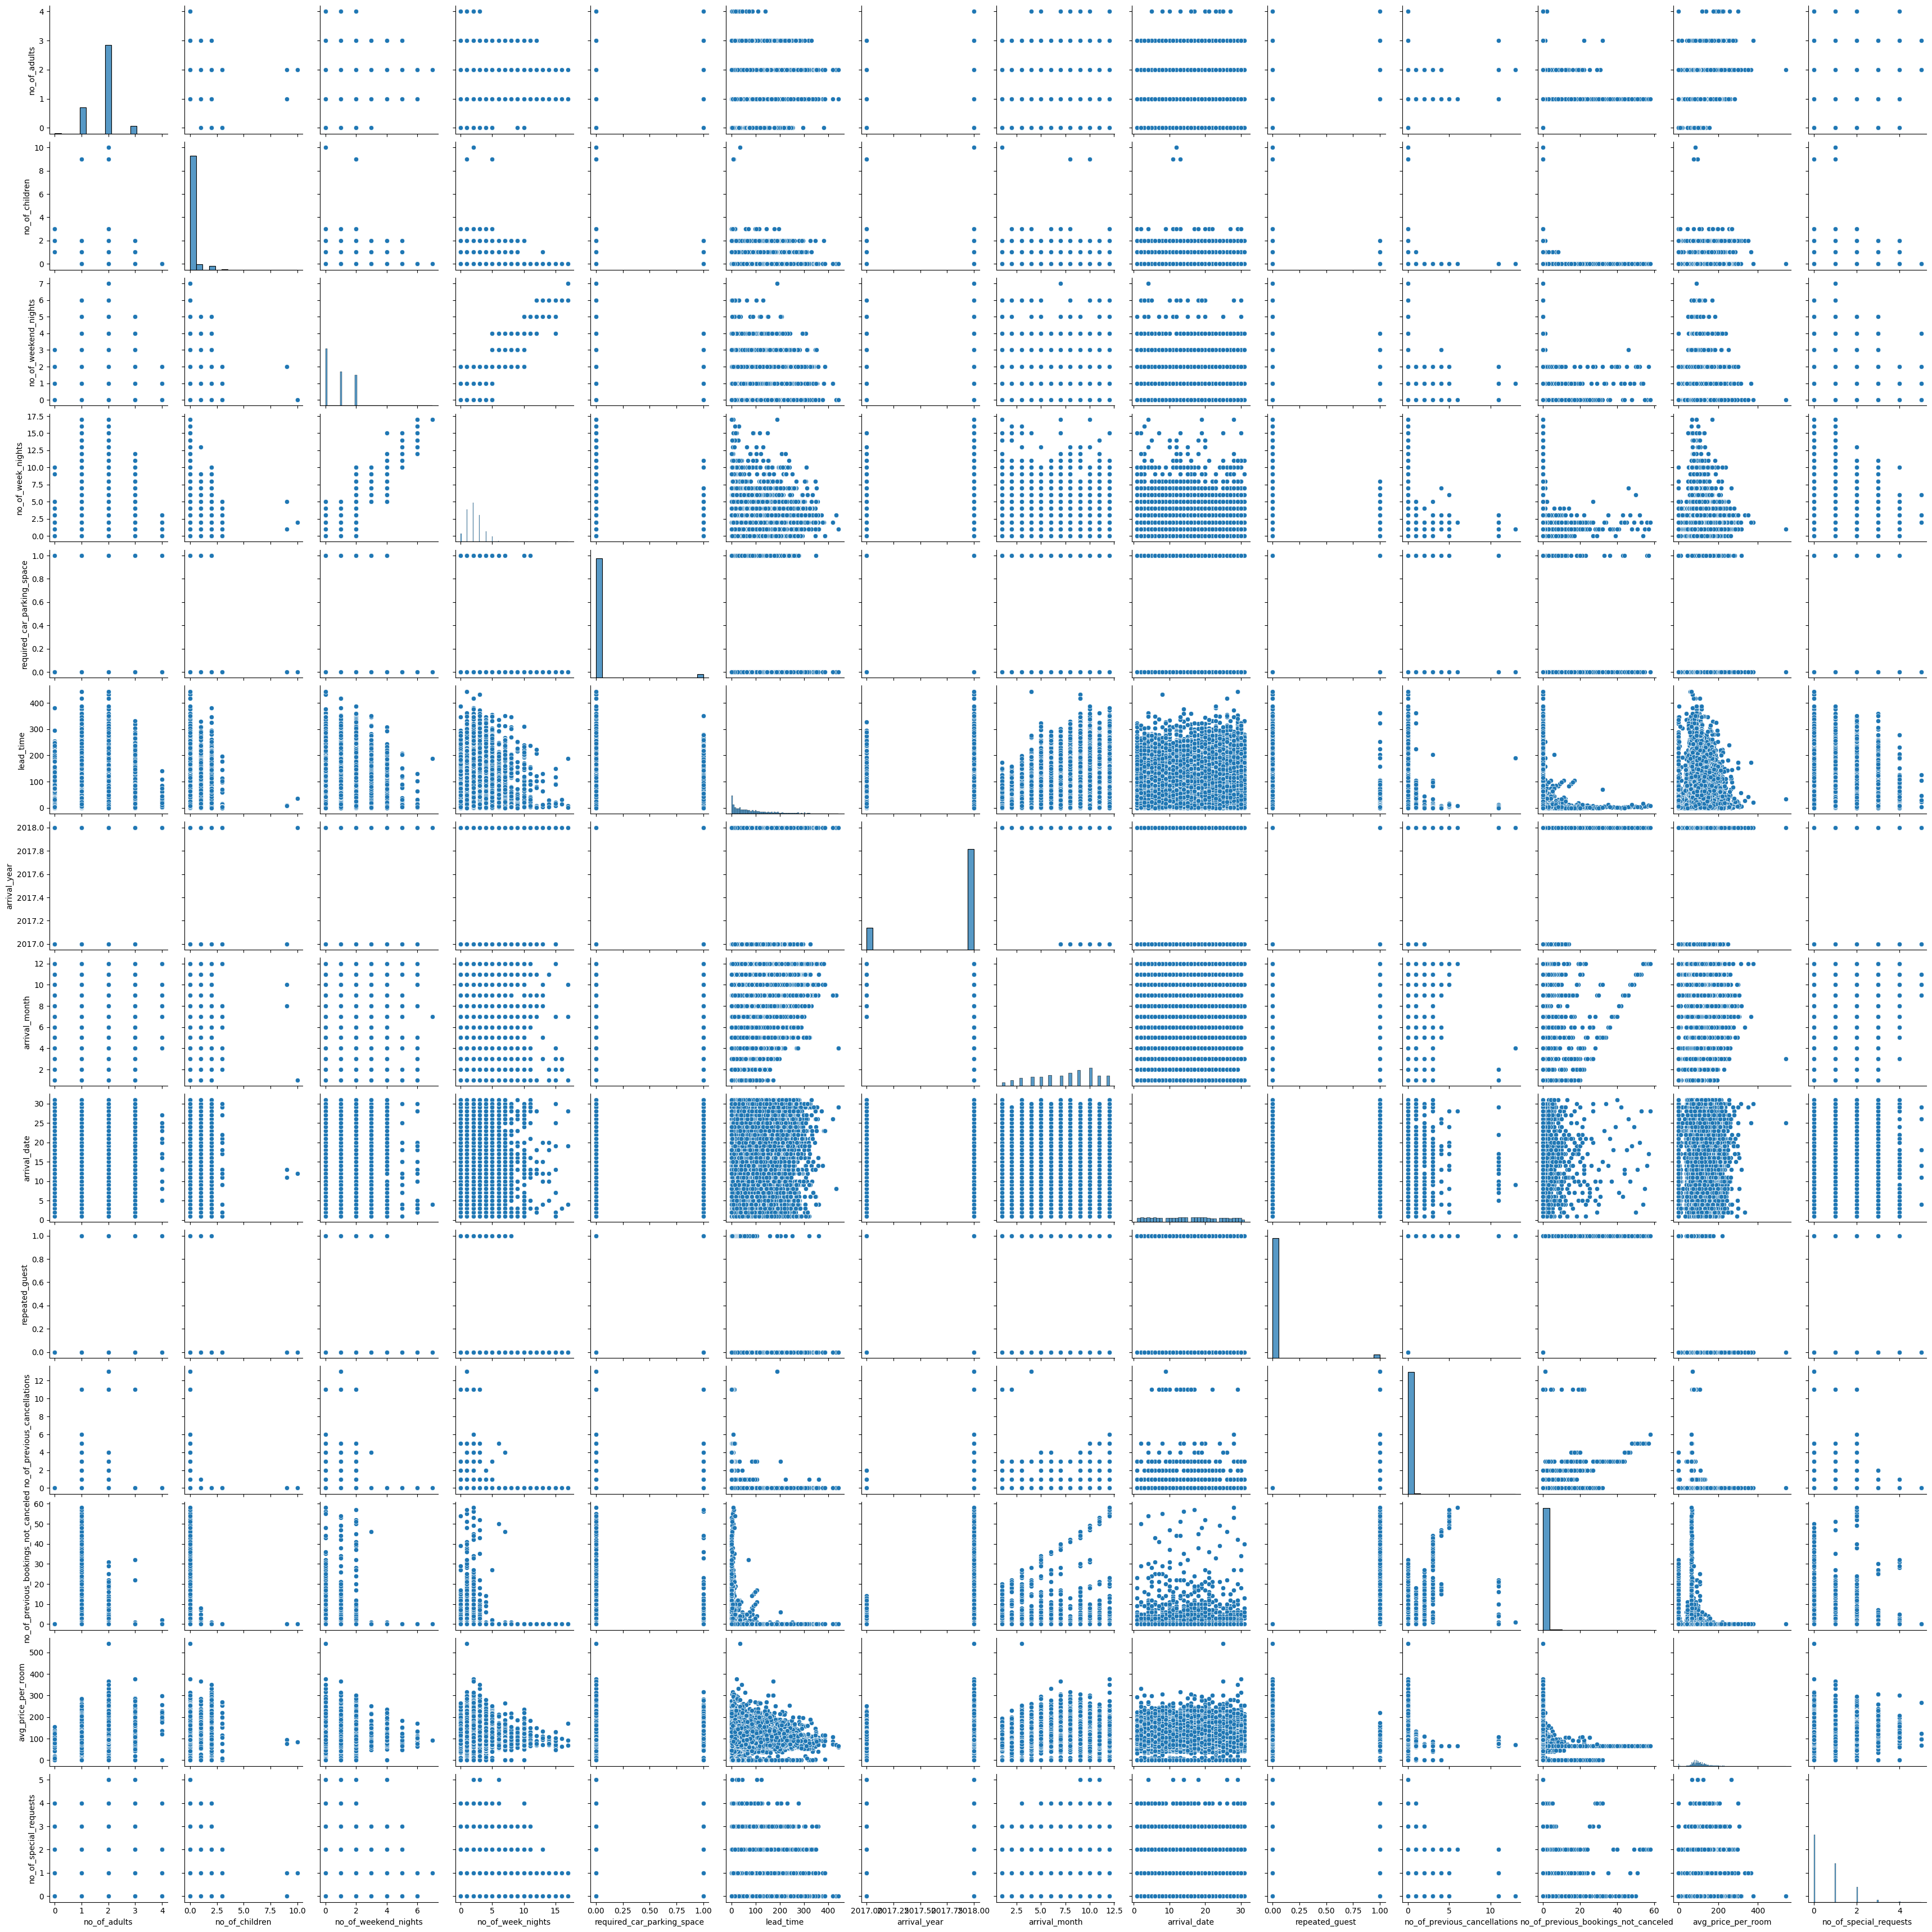

In [93]:
sns.pairplot(data)

The pair plot

In [94]:
bin_values = np.arange(start = 0, stop = 500, step = 10)
data.lead_time.value_counts(bins=bin_values)

(-0.001, 10.0]    6886
(10.0, 20.0]      3202
(30.0, 40.0]      2603
(20.0, 30.0]      2323
(50.0, 60.0]      1857
(40.0, 50.0]      1847
(60.0, 70.0]      1608
(70.0, 80.0]      1593
(80.0, 90.0]      1307
(100.0, 110.0]    1258
(90.0, 100.0]     1159
(110.0, 120.0]    1081
(120.0, 130.0]     789
(140.0, 150.0]     782
(160.0, 170.0]     746
(130.0, 140.0]     699
(150.0, 160.0]     678
(180.0, 190.0]     610
(170.0, 180.0]     580
(190.0, 200.0]     545
(270.0, 280.0]     453
(210.0, 220.0]     403
(300.0, 310.0]     376
(200.0, 210.0]     365
(250.0, 260.0]     345
(240.0, 250.0]     304
(220.0, 230.0]     301
(260.0, 270.0]     294
(310.0, 320.0]     203
(230.0, 240.0]     198
(280.0, 290.0]     169
(290.0, 300.0]     166
(340.0, 350.0]     109
(320.0, 330.0]      92
(330.0, 340.0]      76
(380.0, 390.0]      71
(370.0, 380.0]      70
(410.0, 420.0]      60
(440.0, 450.0]      22
(350.0, 360.0]      20
(430.0, 440.0]      20
(360.0, 370.0]       5
(390.0, 400.0]       0
(400.0, 410

In [97]:
data = pd.get_dummies(data)

In [100]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['booking_status'], data).fit()

# Print out the statistics
model.summary()

KeyError: 'booking_status'

# **Answering Questions:**

Q1 : What are the data types? (Only numeric and categorical)


*   Numerical - no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, required_car_parking_space, lead_time, arrival_year, arrival_month, arrival_date, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests
*   Categorical- Booking_ID, type_of_meal_plan, room_type_reserved, market_segment_type, booking_status


Q2 : Are there missing values?

*   There are no missing values in the dataset


Q3 : What are the likely distributions of the numeric variables?

*   Likely distributions of Numerical variables are plotted above using Histogram, QQ-plot

Q5. Which independent variables have missing data? How much?


*   No independent variables have any missing data or zeros


Q6. Do the training and test sets have the same data?



*   No, I've used a 80, 10, 10 split of Training, Test, Validation split.







**References:**

1. Sckit learn offcial documentation

2. Refered Towards Data Science

3. Eli5 official documentation


The algorithms were referred directly from the Sckit learn official documentation. Visualization was referred from the Machine Learning with scikit-learn Quick Start Guide and Towards Data Science (How do you check the quality of your regression model in Python?). The remaining code was written independently. Feature importance reference is taken from eli5 offical documnetation

<br>
<br>
<br>


**Licensing:**

MIT License

Copyright (c) 2024 sainikhilreddychalla

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.